#Generate Synthetic Jasa Items

Import Libraries

In [109]:
import numpy as np
import pandas as pd

Define data generation quantity

In [110]:
num_stores = 100000  # Number of stores, same number as in user ratings
num_categories = 8  # Number of categories, same as in the user data

The 2D array of category pairs with positive correlations

In [111]:
correlation_pairs = [
    ["cat_1", "cat_8"], ["cat_1", "cat_3"],
    ["cat_1", "cat_5"], ["cat_2", "cat_6"],
    ["cat_2", "cat_3"], ["cat_2", "cat_4"],
    ["cat_2", "cat_8"], ["cat_3", "cat_5"],
    ["cat_3", "cat_7"], ["cat_3", "cat_8"],
    ["cat_4", "cat_5"], ["cat_4", "cat_8"],
    ["cat_5", "cat_8"], ["cat_5", "cat_6"],
    ["cat_7", "cat_8"], ["cat_4", "cat_6"],
]

Generate average store ratings as float values, similar to user ratings

In [112]:
def generate_store_ratings(num_stores):
    # Generate base ratings using the same distribution as user ratings
    base_ratings = np.random.choice([1, 2, 3, 4, 5], size=num_stores, p=[0.025, 0.10, 0.225, 0.40, 0.25])
    # Adding random float variation to the base ratings
    float_ratings = base_ratings + np.random.normal(0, 0.2, num_stores)
    # Clipping and rounding the ratings to 3 decimal places
    return np.clip(float_ratings, 1, 5).round(3)

Create a DataFrame for store data

In [113]:
store_data = pd.DataFrame({
    'store_id': np.arange(1, num_stores + 1),
    'avg_rating': generate_store_ratings(num_stores)
})

Adding one-hot encoded category columns

In [114]:
for i in range(1, num_categories + 1):
    store_data[f'cat_{i}'] = 0

Select up to 3 categories for each store, biased towards correlation pairs

In [115]:
def select_categories(correlation_pairs, num_categories):
    # Decide the number of categories to select: 1, 2, or 3
    num_selected = np.random.choice([1, 2, 3], p=[0.15, 0.70, 0.15])

    if num_selected == 1:
        # Select one random category
        return [np.random.choice([f'cat_{i}' for i in range(1, num_categories + 1)])]
    elif num_selected == 2:
        # Select one pair from the correlation pairs
        chosen_pair = correlation_pairs[np.random.randint(len(correlation_pairs))]
        return list(chosen_pair)
    else:  # num_selected == 3
        # Select one pair and one additional category
        chosen_pair = correlation_pairs[np.random.randint(len(correlation_pairs))]
        remaining_categories = [f'cat_{i}' for i in range(1, num_categories + 1) if f'cat_{i}' not in chosen_pair]
        third_category = np.random.choice(remaining_categories)
        return list(chosen_pair) + [third_category]

Assigning active categories to each store

In [116]:
for index, row in store_data.iterrows():
    active_categories = select_categories(correlation_pairs, num_categories)
    for cat in active_categories:
        store_data.at[index, cat] = 1

Save the store data into a csv

In [117]:
store_csv_file_path = 'synthetic_store_data.csv'
store_data.to_csv(store_csv_file_path, index=False)

## Display the generated Data

Load saved csv

In [118]:
saved_data = pd.read_csv(store_csv_file_path)

Shuffle the data

In [119]:
shuffled_data = saved_data.sample(n=100, random_state=42)

Display 100 values in the table

In [120]:
print(shuffled_data)

       store_id  avg_rating  cat_1  cat_2  cat_3  cat_4  cat_5  cat_6  cat_7  \
75721     75722       4.910      0      0      1      0      0      0      1   
80184     80185       4.052      0      0      1      0      0      0      0   
19864     19865       2.086      0      0      0      0      0      1      0   
76699     76700       3.233      0      0      0      1      1      0      0   
92991     92992       4.124      0      0      1      0      0      0      1   
...         ...         ...    ...    ...    ...    ...    ...    ...    ...   
91957     91958       3.232      0      0      0      1      0      1      0   
81346     81347       5.000      0      0      0      1      1      0      0   
55325     55326       4.756      1      0      0      0      0      0      0   
29857     29858       4.150      1      0      0      0      0      0      0   
71222     71223       4.603      0      0      0      0      1      1      0   

       cat_8  
75721      1  
80184    

## Analyze data for Patterns

Import matplotlib

In [121]:
import matplotlib.pyplot as plt

Load saved csv

In [122]:
file_path = store_csv_file_path
store_data = pd.read_csv(file_path)

Find Category Combination Distributions

In [123]:
category_columns = [f'cat_{i}' for i in range(1, 9)]
store_data['category_combination'] = store_data[category_columns].apply(lambda row: '_'.join(row.index[row == 1]), axis=1)
combination_distribution = store_data['category_combination'].value_counts()

print(combination_distribution)

cat_1_cat_8          4456
cat_7_cat_8          4452
cat_5_cat_8          4435
cat_2_cat_4          4428
cat_3_cat_5          4417
                     ... 
cat_1_cat_2_cat_6     141
cat_2_cat_4_cat_7     141
cat_1_cat_3_cat_4     138
cat_3_cat_4_cat_6     136
cat_2_cat_6_cat_7     133
Name: category_combination, Length: 76, dtype: int64


Plot it

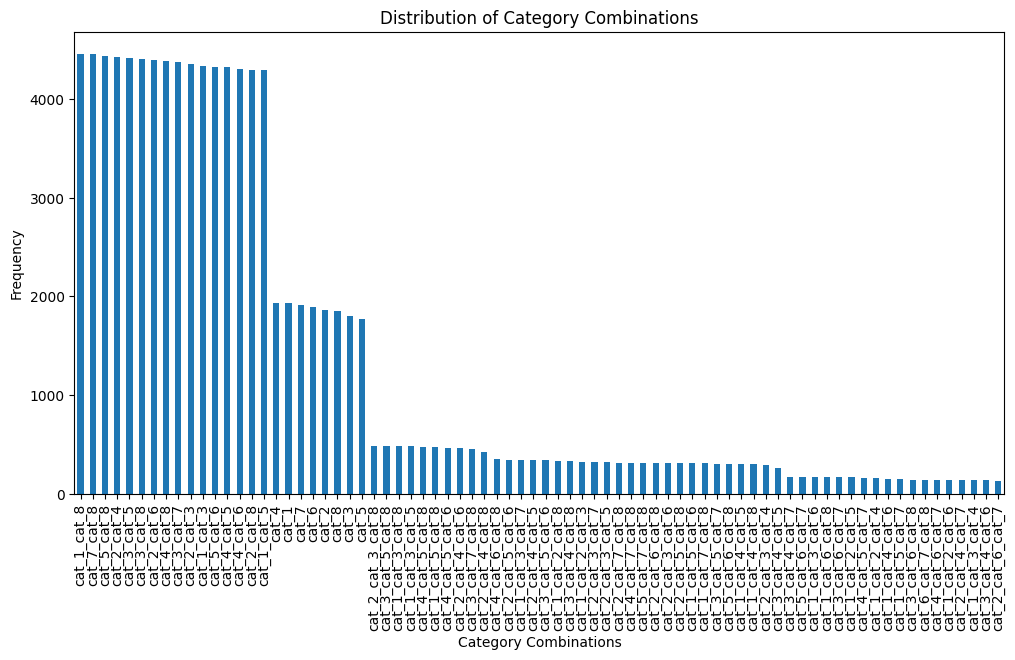

In [124]:
plt.figure(figsize=(12, 6))
combination_distribution.plot(kind='bar')
plt.title('Distribution of Category Combinations')
plt.xlabel('Category Combinations')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Find Category Correlation to it's store rating

In [125]:
category_correlation = store_data[category_columns + ['avg_rating']].corr()['avg_rating'].drop('avg_rating')

print(category_correlation)

cat_1   -0.000578
cat_2   -0.001306
cat_3   -0.001306
cat_4    0.001006
cat_5   -0.000644
cat_6    0.001483
cat_7    0.003308
cat_8   -0.002411
Name: avg_rating, dtype: float64


Plot it

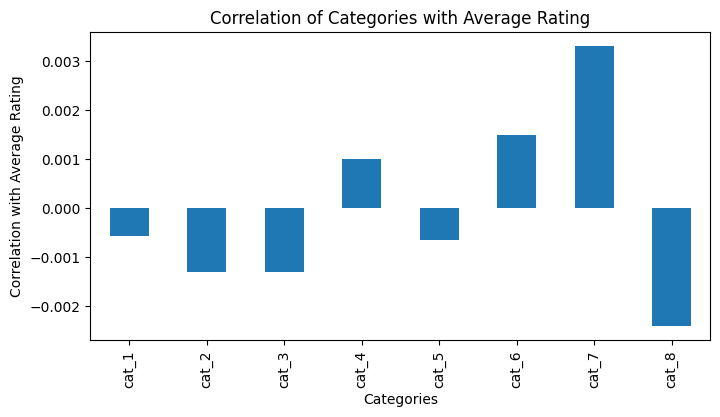

In [126]:
plt.figure(figsize=(8, 4))
category_correlation.plot(kind='bar')
plt.title('Correlation of Categories with Average Rating')
plt.xlabel('Categories')
plt.ylabel('Correlation with Average Rating')
plt.show()